In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/power/Downloads/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.shape

(13200, 7)

In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [8]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

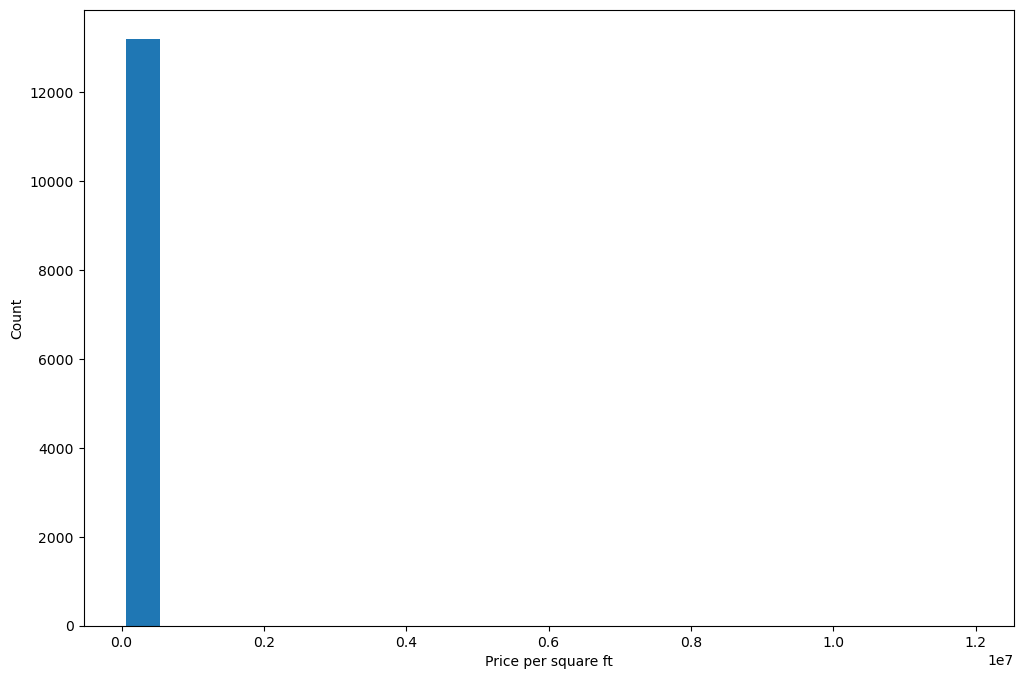

In [9]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

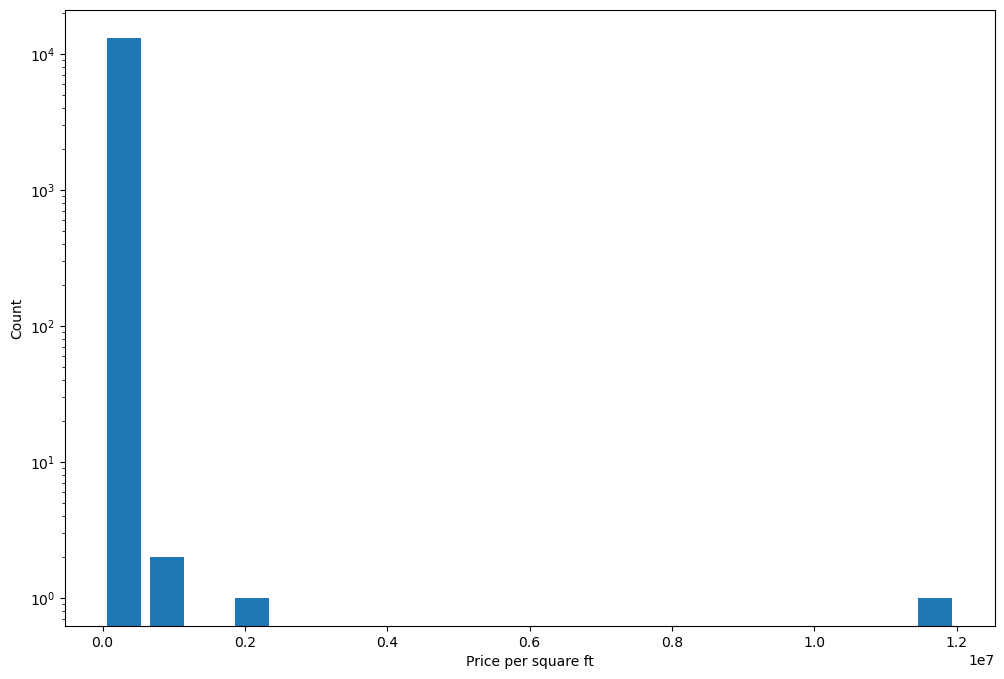

In [10]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least

### Treat outlier using percentile first

In [11]:
lower_limit, upper_limit = df['price_per_sqft'].quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [12]:
no_outlier_df = df[(df['price_per_sqft'] > lower_limit) & (df['price_per_sqft'] < upper_limit)]
no_outlier_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [13]:
no_outlier_df.shape

(13172, 7)

In [16]:
no_outlier_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [17]:
df.shape[0] - no_outlier_df.shape[0]

28

We removed total 28 outliers

(2) Now remove outliers using 4 standard deviation

### Remove outlier using 4 standard deviation

In [6]:
lower_limit = df['price_per_sqft'].mean() - 4*df['price_per_sqft'].std()
lower_limit

-418988.3045700096

In [7]:
upper_limit = df['price_per_sqft'].mean() + 4*df['price_per_sqft'].std()
upper_limit

434828.97805485805

In [24]:
no_outlier_df2 = no_outlier_df[(no_outlier_df['price_per_sqft'] > lower_limit) & (no_outlier_df['price_per_sqft'] < upper_limit)]
no_outlier_df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7360,Raja Rajeshwari Nagar,3 BHK,1400.0,2.0,48.00,3,3428
451,Chandapura,3 BHK,1190.0,2.0,30.35,3,2550
6328,other,5 Bedroom,4050.0,4.0,600.00,5,14814
11225,Nagavara,2 BHK,1247.0,2.0,58.56,2,4696
5028,Hebbal,3 BHK,1255.0,2.0,95.00,3,7569
4982,Koramangala,4 BHK,2461.0,6.0,353.00,4,14343
4889,other,4 Bedroom,2300.0,4.0,200.00,4,8695
9025,Bisuvanahalli,3 BHK,1075.0,2.0,37.00,3,3441
5989,Gubbalala,2 BHK,1008.0,2.0,32.25,2,3199
8172,Yelahanka,2 BHK,1115.0,2.0,60.00,2,5381


In [25]:
no_outlier_df.shape

(13172, 7)

In [26]:
no_outlier_df.shape[0] - no_outlier_df2.shape[0]

0

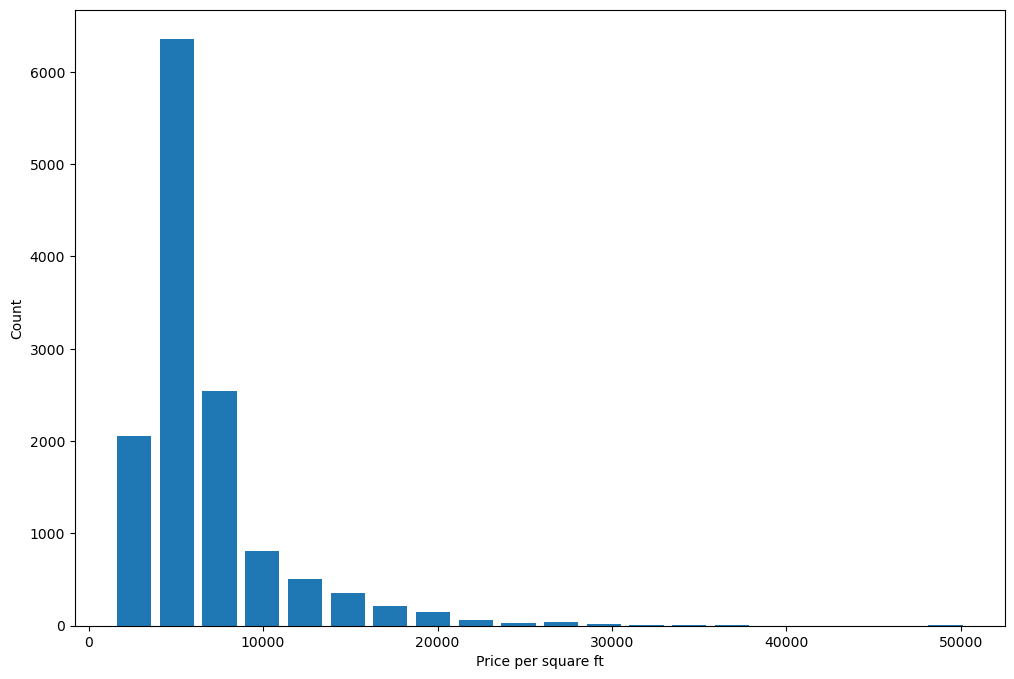

In [27]:
plt.hist(no_outlier_df2.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

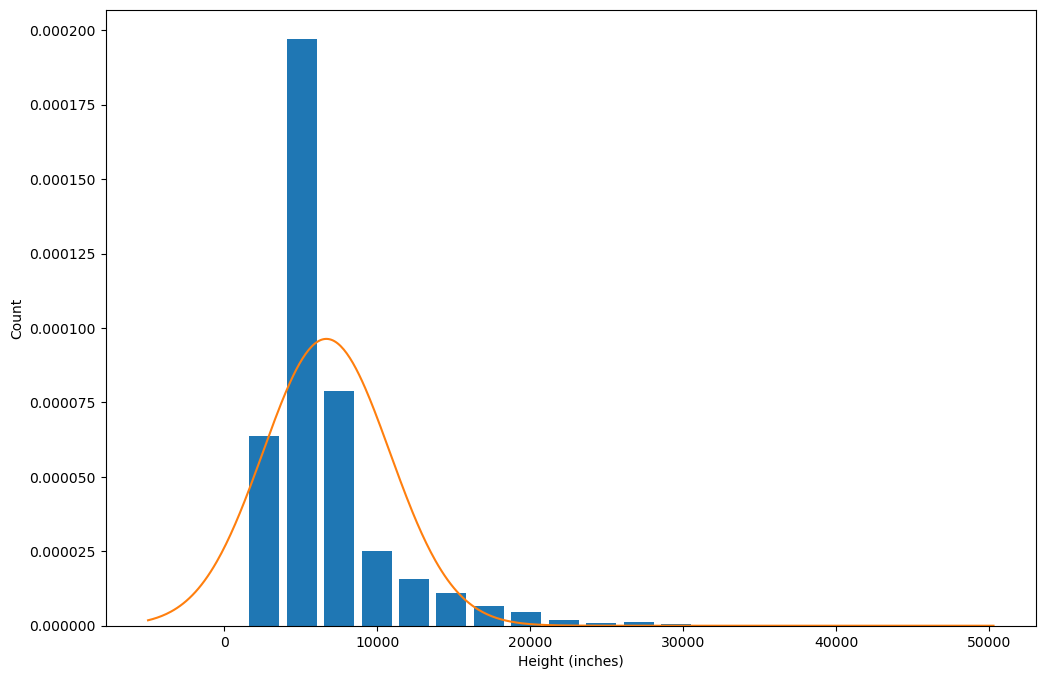

In [29]:
from scipy.stats import norm
import numpy as np

plt.hist(no_outlier_df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, no_outlier_df2.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,no_outlier_df2.price_per_sqft.mean(),no_outlier_df2.price_per_sqft.std()))

### Now remove outliers using z score. Use z score of 4 as your thresold

In [31]:
no_outlier_df['zscore'] = (no_outlier_df.price_per_sqft-no_outlier_df.price_per_sqft.mean())/no_outlier_df.price_per_sqft.std()
no_outlier_df.sample(10)

C:\Users\power\AppData\Local\Temp\ipykernel_5476\1117555311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_df['zscore'] = (no_outlier_df.price_per_sqft-no_outlier_df.price_per_sqft.mean())/no_outlier_df.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3200,Koramangala,3 BHK,1750.0,3.0,130.00,3,7428,0.184579
850,Electronics City Phase 1,2 BHK,1175.0,2.0,51.47,2,4380,-0.551471
11704,Marathahalli,2 BHK,1360.0,2.0,101.00,2,7426,0.184096
7276,other,4 BHK,2000.0,4.0,135.00,4,6750,0.020851
1175,Electronic City,3 BHK,1620.0,3.0,62.00,3,3827,-0.685013
11534,Karuna Nagar,3 BHK,1960.0,3.0,165.00,3,8418,0.423651
4137,other,2 BHK,1097.0,2.0,65.00,2,5925,-0.178375
65,Gunjur,2 BHK,1140.0,2.0,43.00,2,3771,-0.698536
1806,Banashankari,3 Bedroom,600.0,3.0,100.00,3,16666,2.415430
2323,Sarjapur Road,4 BHK,4395.0,4.0,242.00,4,5506,-0.279558


In [33]:
outliers_z = no_outlier_df[(no_outlier_df.zscore < -4) | (no_outlier_df.zscore>4)]
outliers_z.shape

(125, 8)

In [34]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448,6.226568
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629,5.545818
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349,10.549415
3605,other,4 Bedroom,2700.0,6.0,675.0,4,25000,4.427977


In [37]:
df4 = outliers_z[(outliers_z.zscore>-4)&(outliers_z.zscore<4)]
df4.shape

(0, 8)

In [39]:
no_outlier_df.shape[0] - no_outlier_df.shape[0]

0

## Most of these code are wrong